In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## aisles.csv

In [39]:
# Load the data
aisles = pd.read_csv('./data/aisles.csv')
aisles.shape

(134, 2)

In [40]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


## departments.csv

In [5]:
# Load the data
departments = pd.read_csv('./data/departments.csv')
departments.shape

(21, 2)

In [41]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
departments['department'].unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods', 'dairy eggs',
       'household', 'babies', 'snacks', 'deli', 'missing'], dtype=object)

## order_products__prior.csv

In [67]:
# Load the data
opp = pd.read_csv('./data/order_products__prior.csv')
opp.shape

(32434489, 4)

In [68]:
# Have a look at the format of the dataframe
opp.head(10)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


It looks like *add_to_cart_order* gives numbering of the products in each order.

To verify this I will add a column to count the number of products in each order, and see if this corresponds with max *add_to_cart_order* for each order.

In [69]:
opp['count'] = opp.groupby('order_id')['order_id'].transform('count')
opp['add_to_cart_max'] = opp.groupby('order_id')['add_to_cart_order'].transform('max')
opp['match'] = np.where(opp['count']==opp['add_to_cart_max'],
                                          True, False)
opp.head(10)

,order_id,product_id,add_to_cart_order,reordered,count,add_to_cart_max,match
0,2,33120,1,1,9,9,True
1,2,28985,2,1,9,9,True
2,2,9327,3,0,9,9,True
3,2,45918,4,1,9,9,True
4,2,30035,5,0,9,9,True
5,2,17794,6,1,9,9,True
6,2,40141,7,1,9,9,True
7,2,1819,8,1,9,9,True
8,2,43668,9,0,9,9,True
9,3,33754,1,1,8,8,True


In [70]:
opp['match'].unique()

array([ True], dtype=bool)

Confirmed - *add_to_cart_order* is just a count of the items in each order, so is not required for this analysis.

Now look at the distribution of number of products per order.

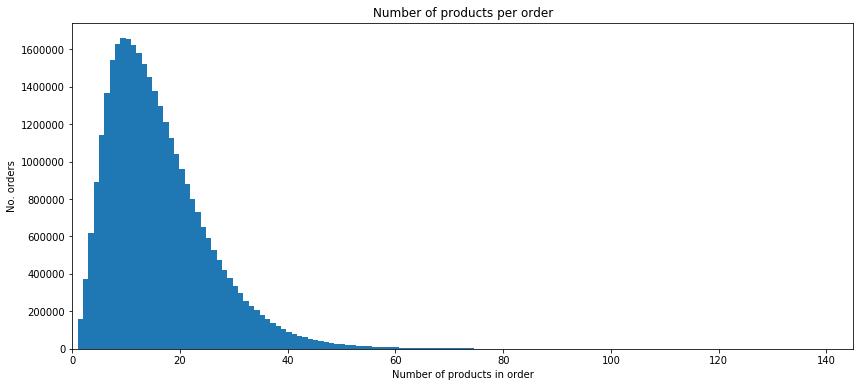

In [71]:
number_bins = opp['count'].max()
plt.figure(num=1,figsize=(14,6))
plt.hist(opp['count'],bins=number_bins)
plt.xlabel('Number of products in order')
plt.ylabel('No. orders')
plt.title('Number of products per order')
plt.ticklabel_format(style='plain')
plt.xlim(0,number_bins)
plt.show()

Calculate the propensity for each product to be reorded.

In [72]:
# Groupby to calculate the number of times each product_id appears in the df
numberBought = opp['product_id'].groupby(opp['product_id']).count()

# Groupby to sum the values in the reorded column for each product_id (since 1 = True) 
reorders = opp['reordered'].groupby(opp['product_id']).sum()

# Combine into 1 dataframe
product_df = pd.concat([numberBought, reorders], axis=1)

# Calculate reorder_rate as the reorder total divided by total number of orders
product_df['reorder_rate'] = product_df['reordered'] / product_df['product_id']

# Rename columns
product_df.rename(columns={'product_id':'number_bought'}, inplace=True)

# Sort by reorder rate then by number of orders, highest to lowest
product_df.sort_values(by=['reorder_rate','number_bought'], axis=0, ascending=False, inplace=True)
print product_df.head()
print product_df.tail()

            number_bought  reordered  reorder_rate
product_id                                        
6433                   68         64      0.941176
2075                   87         81      0.931034
43553                  13         12      0.923077
27740                 101         93      0.920792
14609                  35         32      0.914286
            number_bought  reordered  reorder_rate
product_id                                        
48151                   1          0           0.0
48211                   1          0           0.0
48343                   1          0           0.0
48461                   1          0           0.0
49487                   1          0           0.0


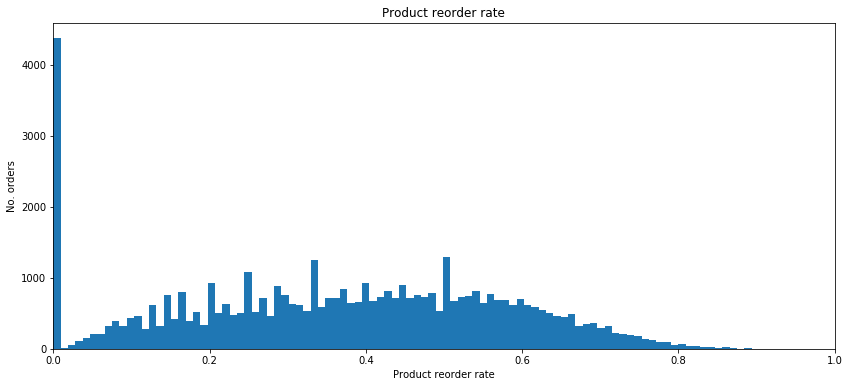

In [26]:
# Plot the reorded rate as a histogram
plt.figure(num=2,figsize=(14,6))
plt.hist(product_df['reorder_rate'],bins=100)
plt.xlabel('Product reorder rate')
plt.ylabel('No. orders')
plt.title('Product reorder rate')
plt.ticklabel_format(style='plain')
plt.xlim(0,1)
plt.show()

In [73]:
len(opp.order_id.unique())

3214874

In [74]:
print 'Average',len(opp) / len(opp.order_id.unique()) , 'products per order'

Average 10 products per order


## order_products__train.csv

In [42]:
order_products__train = pd.read_csv('./data/order_products__train.csv')
order_products__train.head(2)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1


In [43]:
order_products__train.shape

(1384617, 4)

## orders.csv

In [44]:
orders = pd.read_csv('./data/orders.csv')
orders.shape

(3421083, 7)

In [45]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [16]:
orders['order_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

What does the *order_number* feature signify? Why only 100 different values?

In [32]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [35]:
orders['user_id'].unique()

array([     1,      2,      3, ..., 206207, 206208, 206209])

See how many unique users are in each dataset.

In [38]:
for order_set in orders['eval_set'].unique():
    print order_set, len(orders[orders['eval_set']==order_set]['user_id'].unique())

 prior 206209
train 131209
test 75000


## products.csv

In [47]:
products = pd.read_csv('./data/products.csv')
products.shape

(49688, 4)

In [48]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Merge the *aisle* and *department* information into the *products* dataset.

In [53]:
products_full_df = pd.merge(products, aisles, how='left', left_on='aisle_id', right_on='aisle_id')
products_full_df = pd.merge(products_full_df, departments, \
                            how='left', left_on='department_id', right_on='department_id')
products_full_df.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


Calculate number of products in each aisle.

In [62]:
products_grp = products_full_df['product_name'].groupby(products_full_df['aisle']).count()
print products_grp.sort_values(ascending=False).head()
print
print products_grp.sort_values(ascending=False).tail()

aisle
missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
Name: product_name, dtype: int64

aisle
frozen juice                    47
baby accessories                44
packaged produce                32
bulk grains rice dried goods    26
bulk dried fruits vegetables    12
Name: product_name, dtype: int64


Calculate number of aisles in each department.

In [66]:
aisles_grp = products_full_df['aisle'].groupby(products_full_df['department']).count()
print aisles_grp.sort_values(ascending=False).head()
print 
print aisles_grp.sort_values(ascending=False).tail()

department
personal care    6563
snacks           6264
pantry           5371
beverages        4365
frozen           4007
Name: aisle, dtype: int64

department
alcohol         1054
pets             972
meat seafood     907
other            548
bulk              38
Name: aisle, dtype: int64


## sample_submission.csv

In [24]:
sample_submission = pd.read_csv('../data/sample_submission.csv')
sample_submission.head(2)

,order_id,products
0,17,39276 29259
1,34,39276 29259
